In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
from citipy import citipy

In [2]:
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

pimenta bueno br
hilo us
bluff nz
mayor pablo lagerenza py
xuddur so
kamenka ru
ushuaia ar
georgetown sh
odweyne so
paamiut gl
cape town za
iranshahr ir
kaitangata nz
hobart au
rikitea pf
juegang cn
tilichiki ru
hilo us
albany au
saint george bm
esperance au
sibolga id
oussouye sn
podyuga ru
bluff nz
busselton au
busselton au
puerto ayora ec
puerto ayora ec
waddan ly
cape town za
puerto ayora ec
barentsburg sj
viedma ar
vaini to
yellowknife ca
cabo san lucas mx
bathsheba bb
kahului us
busselton au
tuktoyaktuk ca
ust-uda ru
lamar us
pevek ru
iqaluit ca
vilyuysk ru
saiki jp
ushuaia ar
hithadhoo mv
port keats au
jamestown sh
kavieng pg
los llanos de aridane es
marystown ca
jamestown sh
saleaula ws
belushya guba ru
rio grande br
ushuaia ar
cap malheureux mu
hithadhoo mv
dikson ru
taolanaro mg
castro cl
vaini to
vaini to
rikitea pf
thompson ca
onega ru
albany au
kayes ml
aasiaat gl
narsaq gl
bluff nz
silca hn
ushuaia ar
borovskoy kz
bosobolo cd
yellowknife ca
cherskiy ru
nizhneyansk ru
punt

hasaki jp
tasiilaq gl
hithadhoo mv
caravelas br
jamestown sh
bengkulu id
pak phanang th
churapcha ru
atuona pf
carnarvon za
sur om
kysyl-syr ru
chuy uy
cantagallo co
lagoa pt
xining cn
lebedinyy ru
rikitea pf
morondava mg
bethel us
coihaique cl
cayenne gf
raga sd
vaini to
noumea nc
punta arenas cl
ushuaia ar
attawapiskat ca
port elizabeth za
urumqi cn
busselton au
mys shmidta ru
rikitea pf
marcona pe
sitka us
fiche et
tsihombe mg
avarua ck
dingle ie
saskylakh ru
punta arenas cl
naze jp
rikitea pf
ostrovnoy ru
saskylakh ru
rikitea pf
nalut ly
bluff nz
hope us
hermanus za
hasaki jp
ancud cl
ushuaia ar
bambous virieux mu
port elizabeth za
arroyo us
shache cn
victoria sc
taltal cl
esperance au
punta arenas cl
tsihombe mg
zaraza ve
airai pw
butaritari ki
lesogorsk ru
punta arenas cl
launceston au
tiksi ru
gigmoto ph
saint anthony ca
cape town za
new norfolk au
cape town za
mar del plata ar
sobolevo ru
puerto ayora ec
vozhega ru
ushuaia ar
yerbogachen ru
surt ly
geraldton au
morar in
punta a

In [5]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

614

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pimenta bueno
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | mayor pablo lagerenza
Processing Record 5 of Set 1 | xuddur
Processing Record 6 of Set 1 | kamenka
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | odweyne
Processing Record 10 of Set 1 | paamiut
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | iranshahr
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | juegang
Processing Record 17 of Set 1 | tilichiki
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | sibolga
Processing Record 22 of Set 1 | oussouye
Processing Record 23 of Set 1 | podyu

Processing Record 41 of Set 4 | wasilla
Processing Record 42 of Set 4 | nikolskoye
Processing Record 43 of Set 4 | aksehir
Processing Record 44 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 4 | jomalig
City not found. Skipping...
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | tacuarembo
Processing Record 48 of Set 4 | olga
Processing Record 49 of Set 4 | kokopo
Processing Record 50 of Set 4 | matagami
Processing Record 1 of Set 5 | felidhoo
City not found. Skipping...
Processing Record 2 of Set 5 | mecca
Processing Record 3 of Set 5 | mahebourg
Processing Record 4 of Set 5 | bonthe
Processing Record 5 of Set 5 | lata
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | hofn
Processing Record 8 of Set 5 | pachino
Processing Record 9 of Set 5 | dingle
Processing Record 10 of Set 5 | seymchan
Processing Record 11 of Set 5 | saint-philippe
Processing Record 12 of Set 5 | tabou
Processing Record 13 of Set 5 | weinan
Proc

Processing Record 27 of Set 8 | karasuk
Processing Record 28 of Set 8 | lasa
Processing Record 29 of Set 8 | oksbol
Processing Record 30 of Set 8 | san vicente
Processing Record 31 of Set 8 | sanchor
Processing Record 32 of Set 8 | japura
Processing Record 33 of Set 8 | touros
Processing Record 34 of Set 8 | mount isa
Processing Record 35 of Set 8 | faya
Processing Record 36 of Set 8 | balad
Processing Record 37 of Set 8 | adrar
Processing Record 38 of Set 8 | herzberg
Processing Record 39 of Set 8 | chama
Processing Record 40 of Set 8 | fairbanks
Processing Record 41 of Set 8 | clyde river
Processing Record 42 of Set 8 | pacific grove
Processing Record 43 of Set 8 | codrington
Processing Record 44 of Set 8 | otane
Processing Record 45 of Set 8 | tiksi
Processing Record 46 of Set 8 | farafangana
Processing Record 47 of Set 8 | nyurba
Processing Record 48 of Set 8 | dapdap
Processing Record 49 of Set 8 | fortuna
Processing Record 50 of Set 8 | ushibuka
Processing Record 1 of Set 9 | ham

Processing Record 15 of Set 12 | lethem
Processing Record 16 of Set 12 | phan thiet
Processing Record 17 of Set 12 | carlsbad
Processing Record 18 of Set 12 | ahmadpur east
Processing Record 19 of Set 12 | emborion
Processing Record 20 of Set 12 | trelew
Processing Record 21 of Set 12 | makakilo city
Processing Record 22 of Set 12 | khani
Processing Record 23 of Set 12 | port said
Processing Record 24 of Set 12 | maykain
City not found. Skipping...
Processing Record 25 of Set 12 | salinas
Processing Record 26 of Set 12 | alta floresta
Processing Record 27 of Set 12 | namibe
Processing Record 28 of Set 12 | sinazongwe
Processing Record 29 of Set 12 | ramanagaram
Processing Record 30 of Set 12 | bouna
Processing Record 31 of Set 12 | masuda
Processing Record 32 of Set 12 | bacuit
City not found. Skipping...
Processing Record 33 of Set 12 | marsh harbour
Processing Record 34 of Set 12 | forbes
Processing Record 35 of Set 12 | nizwa
Processing Record 36 of Set 12 | richards bay
Processing 

In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pimenta Bueno,-11.67,-61.19,101.35,19,34,5.06,BR,2020-08-30 20:13:22
1,Hilo,19.73,-155.09,82.40,65,90,3.36,US,2020-08-30 20:10:04
2,Bluff,-46.60,168.33,52.29,62,99,22.57,NZ,2020-08-30 20:10:30
3,Mayor Pablo Lagerenza,-19.93,-60.77,87.66,39,40,11.30,PY,2020-08-30 20:13:23
4,Xuddur,4.12,43.89,75.85,69,0,20.33,SO,2020-08-30 20:13:23
5,Kamenka,51.32,42.77,65.62,52,0,6.51,RU,2020-08-30 20:13:24
6,Ushuaia,-54.80,-68.30,28.40,92,75,29.97,AR,2020-08-30 20:08:26
7,Georgetown,5.41,100.34,80.60,94,40,3.36,MY,2020-08-30 20:11:39
8,Odweyne,9.41,45.06,82.11,42,99,12.66,SO,2020-08-30 20:13:24
9,Paamiut,61.99,-49.67,47.68,66,67,15.61,GL,2020-08-30 20:13:25


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pimenta Bueno,BR,2020-08-30 20:13:22,-11.67,-61.19,101.35,19,34,5.06
1,Hilo,US,2020-08-30 20:10:04,19.73,-155.09,82.40,65,90,3.36
2,Bluff,NZ,2020-08-30 20:10:30,-46.60,168.33,52.29,62,99,22.57
3,Mayor Pablo Lagerenza,PY,2020-08-30 20:13:23,-19.93,-60.77,87.66,39,40,11.30
4,Xuddur,SO,2020-08-30 20:13:23,4.12,43.89,75.85,69,0,20.33
...,...,...,...,...,...,...,...,...,...
558,Cockburn Town,TC,2020-08-30 20:16:33,21.46,-71.14,87.80,58,40,11.41
559,Koumac,NC,2020-08-30 20:16:33,-20.57,164.28,64.83,77,6,5.12
560,Puerto Carreno,CO,2020-08-30 20:16:34,6.19,-67.49,82.40,74,40,6.93
561,Mysliborz,PL,2020-08-30 20:16:34,52.92,14.87,62.01,92,100,1.01


In [10]:
# Create the output file (CSV).
output_data_file = "Weather_Data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting the data

In [21]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
import time

In [23]:
today = time.strftime('%x')
today

'08/30/20'

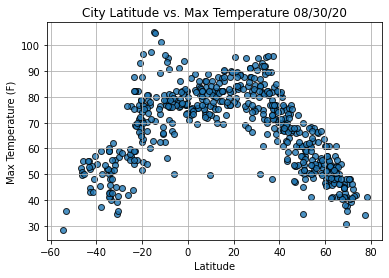

In [28]:
plt.scatter(lats, max_temp, edgecolor="black", linewidths=1, alpha=0.8, label='Cities', marker='o')
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('Weather_Data/fig1.png')
plt.show()

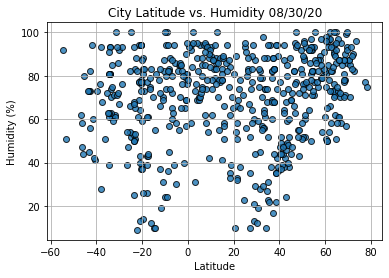

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

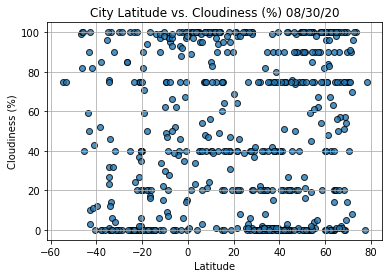

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

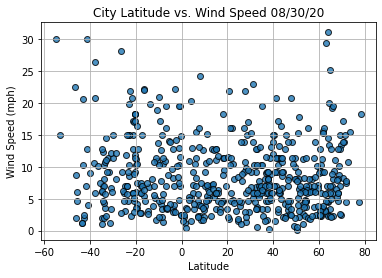

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()